# Revenue Analysis – Solstice Opal Hotel  
**Project: Understanding Ancillary Revenue Patterns & Defining a Core KPI**  
Author: [mahmoud rabea]  
Date: January 2026

# import the libs

In [40]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_theme(style="darkgrid")

# load the data

In [2]:
guest_profile = pd.read_csv(r'C:\Users\Mahmoud\OneDrive\Desktop\Data Camp\project\Revenue at Solstice Opal Hotel\data\da_sample_guest_profiles.csv')
stay_details = pd.read_csv(r'C:\Users\Mahmoud\OneDrive\Desktop\Data Camp\project\Revenue at Solstice Opal Hotel\data\da_sample_stay_details.csv')
ancillary_spend = pd.read_csv(r'C:\Users\Mahmoud\OneDrive\Desktop\Data Camp\project\Revenue at Solstice Opal Hotel\data\da_sample_ancillary_spend.csv')

## Datasets Overview

| Table              | Rows | Key Columns                          | Purpose                          |
|--------------------|------|--------------------------------------|----------------------------------|
| guest_profile      | 400  | guest_id, loyalty_tier, marketing_consent | Guest characteristics & consent |
| stay_details       | 600  | guest_id, check_in_date, reason_for_stay, number_of_guests, booking_channel | Booking context                 |
| ancillary_spend    | 800  | guest_id, category, amount_spent     | Additional revenue sources      |

# data validation

In [3]:
# tables shape
print(guest_profile.shape)
print(stay_details.shape)
print(ancillary_spend.shape)

(400, 3)
(600, 6)
(800, 3)


In [4]:
# table describe
print(guest_profile.describe())
print(stay_details.describe())
print(ancillary_spend.describe())

         guest_id
count  400.000000
mean   200.500000
std    115.614301
min      1.000000
25%    100.750000
50%    200.500000
75%    300.250000
max    400.000000
         guest_id  number_of_guests
count  600.000000        600.000000
mean   197.818333          1.690000
std    112.493481          0.817525
min      1.000000          1.000000
25%    104.750000          1.000000
50%    201.500000          2.000000
75%    287.000000          2.000000
max    399.000000          4.000000
       amount_spent
count    721.000000
mean      84.077517
std       66.031116
min        1.340000
25%       38.280000
50%       65.740000
75%      111.050000
max      578.900000


## data cleaning and validation for guest_profile

### Validation Rules – guest_profile

| Column | Expected Type | Rule |
|------|---------------|------|
| guest_id | string | unique, not null |
| loyalty_tier | string | contain four values(Bronze, Silver, Gold, Platinum) |
| marketing_consent | bool | True, False |


In [5]:
# show the null values in guest_profile
print(guest_profile.isna().sum())

# check info about columns
print(guest_profile.info())

# check if there any duplicate values in guest_id column
print(guest_profile[guest_profile['guest_id'].duplicated()])

# change the col types
guest_profile['guest_id'] = guest_profile['guest_id'].astype(str)

guest_profile['loyalty_tier'].value_counts()

guest_profile['loyalty_tier'] = guest_profile['loyalty_tier'].fillna('Bronze')

# to check uniqueness
guest_profile['guest_id'].is_unique

# check the table 
print(guest_profile.dtypes)

guest_id               0
loyalty_tier         193
marketing_consent      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   guest_id           400 non-null    int64 
 1   loyalty_tier       207 non-null    object
 2   marketing_consent  400 non-null    bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 6.8+ KB
None
Empty DataFrame
Columns: [guest_id, loyalty_tier, marketing_consent]
Index: []
guest_id             object
loyalty_tier         object
marketing_consent      bool
dtype: object


# clean and validated the guest_profiles table
## guest_id column:
- no cleaning needed for this column
- change data type into string because its an id column
## loyalty_tier column
- fill the null values with bronze tier (revenue manager recommendations)
- no need to change or replace any values
- no needed to change datatype
## marketing_consent column
- no need cleaning for this column
- no need to change the type

### Validation Rules – ancillary_spend

| Column | Expected Type | Rule |
|------|---------------|------|
| guest_id | string | unique, not null |
| category | string | contain four values(leisure, business) |
| amount_spend | float | not null |

In [6]:
# check the table 
print(ancillary_spend.head())
print(ancillary_spend.info())

# describe the data
print(ancillary_spend.describe())

# show the null values in ancillary_spend
# print(ancillary_spend.isna().sum())

# cleaing the guest_id column
ancillary_spend['guest_id'] = ancillary_spend['guest_id']\
    .str.strip().str.replace('[DSA]' , '' , regex=True)

# print(ancillary_spend[ancillary_spend.isnull().any(axis = 1)])

dict_cat = ancillary_spend.groupby('category')['amount_spent'].median().to_dict()
ancillary_spend['amount_spent'] = ancillary_spend['amount_spent'].fillna(ancillary_spend['category'].map(dict_cat))
print(ancillary_spend.isna().sum())

# to check uniqueness
guest_profile['guest_id'].is_unique

  guest_id category  amount_spent
0     170D   Dining           NaN
1     124D   Dining         49.72
2     357S      Spa         14.43
3      35D   Dining        330.85
4      87D   Dining           NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   guest_id      800 non-null    object 
 1   category      800 non-null    object 
 2   amount_spent  721 non-null    float64
dtypes: float64(1), object(2)
memory usage: 18.9+ KB
None
       amount_spent
count    721.000000
mean      84.077517
std       66.031116
min        1.340000
25%       38.280000
50%       65.740000
75%      111.050000
max      578.900000
guest_id        0
category        0
amount_spent    0
dtype: int64


# clean and validated the ancillary_spend table
## guest_id column:
- clean this column from the letter values to make merging possible
- no needed to change datatype
## category column
- no need cleaning for this column
- no need to change or replace any values
- no needed to change datatype
## amount_spent column
- no need cleaning for this column
- replace the null values with the median for each category
- i used the median because the data wasn't normaly distributed
- no need to change the type

### Validation Rules – stay_details

| Column | Expected Type | Rule |
|------|---------------|------|
| guest_id | string | not null |
| check_in_date | date | not null |
| stay_id | string | unique |
| booking_channel | string | contain three values(website, travel_agent, corporate) |
| reason_for_stay | string | contain two values(leisure, business) |
| number_of_guests | string | contain four values(1, 2, 3, 4) |

In [7]:
# show the first rows
print(stay_details.head())
print(stay_details.info())
print(stay_details.describe())

# work with date field
stay_details['check_in_date'] = pd.to_datetime(stay_details['check_in_date']).dt.floor('D')

# gest_id col
# print(stay_details[stay_details['guest_id'].duplicated()])
# print(stay_details['guest_id'].value_counts()[lambda x: x > 1])
# print(stay_details[stay_details.duplicated('guest_id', keep=False)].sort_values(['guest_id' , 'check_in_date']))
stay_details['guest_id'] = stay_details['guest_id'].astype(str)

print(stay_details.dtypes)

# booking_channel col
print(stay_details['booking_channel'].value_counts())

# reason_for_stay col
print(stay_details['reason_for_stay'].value_counts())

# number_of_guests col
# print(stay_details['number_of_guests'].value_counts())
stay_details['number_of_guests'] = stay_details['number_of_guests'].astype(str)
# print(stay_details['number_of_guests'].isna().sum())
print(stay_details.info())


   guest_id               check_in_date stay_id booking_channel  \
0       238  2025-10-25 12:09:35.704163       1         website   
1       129  2025-11-07 12:09:35.704163       2       corporate   
2       332  2025-09-30 12:09:35.704163       3         website   
3       153  2025-09-06 12:09:35.704163       4       corporate   
4       305  2025-11-23 12:09:35.704163       5         website   

  reason_for_stay  number_of_guests  
0        business                 4  
1        business                 2  
2        business                 1  
3        business                 4  
4        business                 2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   guest_id          600 non-null    int64 
 1   check_in_date     600 non-null    object
 2   stay_id           600 non-null    object
 3   booking_channel   600 non-null

# clean and validated the amount_spend table
## guest_id column:
- no need cleaning for this column
- no needed to change datatype
## check_in_date column
- cut the time from the column
- change data type into date
- no need to change or replace any values
## stay_id column
- no need cleaning for this column
- no need to change the type
## booking_channel column:
- no need cleaning for this column
- no need to change the type
## reason_for_stay column
- no need cleaning for this column
- no need to change the type
## number_of_guests column
- no need cleaning for this column
- change the type to string (categorical column)

# joining the tables

# joining the tables
- two facts table (ancillary_spend, stay_details)
- one dim table (guest_profile)

In [30]:
# Merge
data = stay_details.merge(ancillary_spend, on='guest_id', how='left')
data = data.merge(guest_profile, on='guest_id', how='left')

print(data.shape)
print(data.isna().sum())


(1322, 10)
guest_id              0
check_in_date         0
stay_id               0
booking_channel       0
reason_for_stay       0
number_of_guests      0
category             71
amount_spent         71
loyalty_tier          0
marketing_consent     0
dtype: int64


## Key Findings

1. **Seasonality is strong**
   - November = peak month (~$316k ancillary revenue)
   - December = sharp drop (winter effect)

2. **Dining dominates revenue** (~65–70% of ancillary)
   → Spa & Activities are underdeveloped

3. **High-value segments**
   - Platinum guests: ~2.1× higher ARPS than Bronze
   - Leisure stays with 4 guests: highest average spend

## Recommendations (prioritized)

1. Launch winter promotion packages (indoor spa + dining bundles) targeting leisure groups
2. Create Platinum-exclusive upselling flows at check-in / app
3. A/B test menu/offer changes in dining — goal +10% uplift
4. Increase email campaigns to Bronze → Silver upgrades (using marketing_consent)

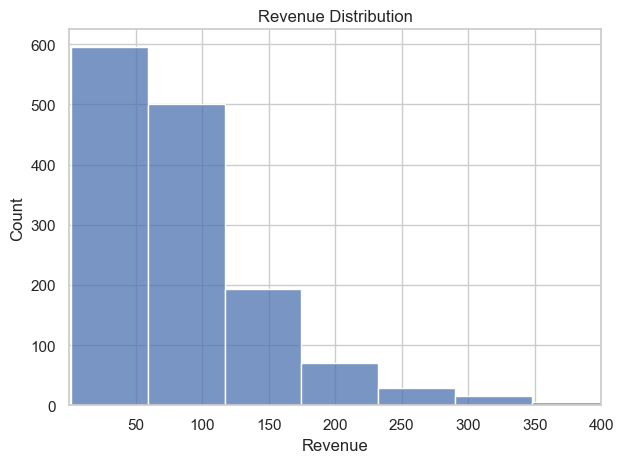

In [9]:
# the destribution of the revenue
plt.figure()
sns.histplot(data , x = 'amount_spent' , bins = 10)

xlist = [ 50 , 100 , 150 , 200 , 250 , 300 , 350 , 400]
plt.xticks(xlist)
plt.xlim(0, 400)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

### insight
- show the distribution of the revenue
- by building histogram
    1 - the distribution is left sckwed
    2 - most values of revenue between (50 : 150 )

booking_channel
website         568
travel_agent    501
corporate       253
Name: count, dtype: int64


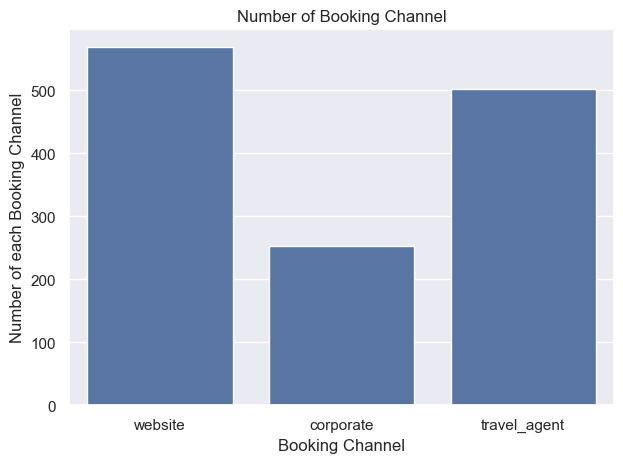

In [45]:
# the count of each booking channel
count_bc = data['booking_channel'].value_counts()
print(count_bc)
sns.countplot(data , x = 'booking_channel' )

plt.title('Number of Booking Channel')
plt.xlabel('Booking Channel')
plt.ylabel('Number of each Booking Channel')

plt.tight_layout()
plt.show()

## insights
- see how our most customers booked with as
- by creating bar charts
- website booking is the most booking channel customers with 535
- comes next the travel agent with 479
- and the last is corporate with 237
### direct the marketing team to advertise more in our website and make programs to guide the travel agent

     category  amount_spent  percentage
0  Activities      17343.83   14.694002
1      Dining      67044.03   56.800897
2         Spa      33645.54   28.505101


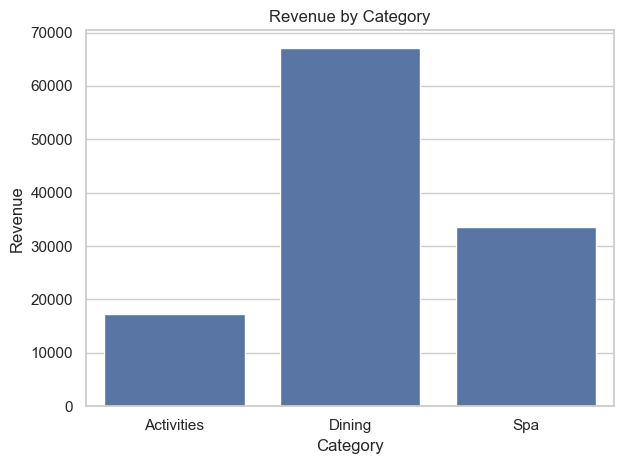

In [15]:
# revenue by category
rev_by_cat = data.groupby('category')['amount_spent'].sum().reset_index()
rev_by_cat['percentage'] = rev_by_cat['amount_spent'] / rev_by_cat['amount_spent'].sum() * 100
print(rev_by_cat)

plt.figure()
sns.barplot(data = rev_by_cat , x = 'category' , y = 'amount_spent' , errorbar=None)
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

## insights
- analyzed the categorical column by revenue
- by creating bar chart
- releving thats more than 670k comes from dining category which is more than 54 percent of our revenue
### which make sense because all guests using dining room

  loyalty_tier  amount_spent
0       Bronze     69.322873
1         Gold     93.849812
2     Platinum    146.299338
3       Silver     80.729518


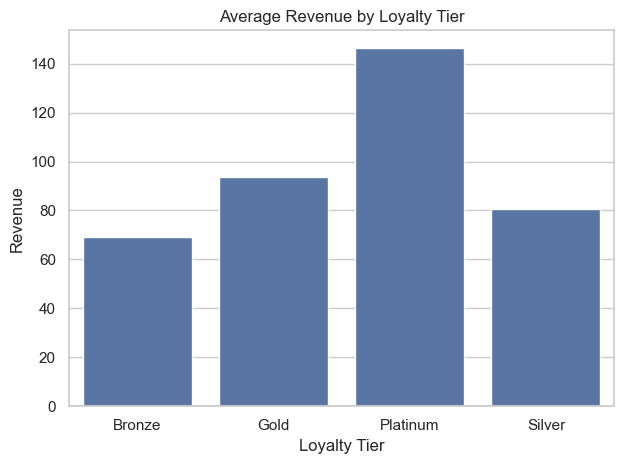

In [12]:
# which loyalty tier genrate the most revenue
rev_by_lt = data.groupby('loyalty_tier')['amount_spent'].mean().reset_index()
print(rev_by_lt)

plt.figure()
sns.barplot(data = rev_by_lt , x = 'loyalty_tier' , y = 'amount_spent' , errorbar=None)
plt.title('Average Revenue by Loyalty Tier')
plt.xlabel('Loyalty Tier')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

## insights
- analyzing the loyalty tiers by average revenue
- by using bar chart
- the platinum tier spent more than any other tier
### results
- we need to focues our resource to make more categories visable to the platinum tier
### rising questions
- is there any other tiers focues on one category or not
- how we can viz this question

category      Activities      Dining         Spa
loyalty_tier                                    
Bronze         74.533302   73.061576   59.496878
Gold          115.106364   93.539580   87.867500
Platinum      132.346364  152.170811  143.111250
Silver         59.691642   93.890637   71.873056


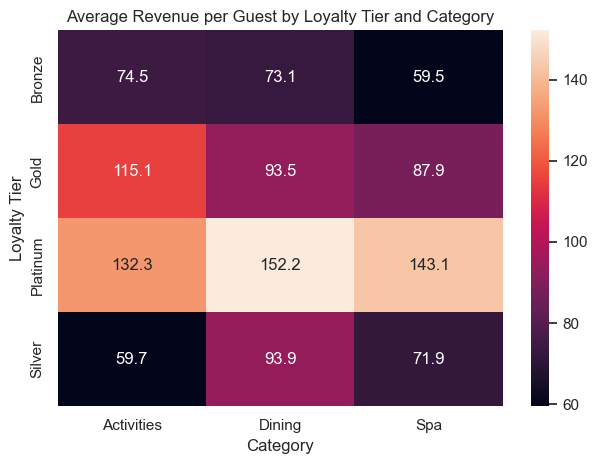

In [13]:
# analyize the revenue with categories and loyalty tiers
# AVPG

calc_ly_cat_rev = data.groupby(['loyalty_tier' , 'category']).agg({ 'amount_spent' : 'sum' , 'guest_id' : 'count'}).reset_index()
calc_ly_cat_rev['average_revenue_per_guest'] = calc_ly_cat_rev['amount_spent'] / calc_ly_cat_rev['guest_id']

pvt_calc_ly_cat_rev = calc_ly_cat_rev.pivot_table( index = 'loyalty_tier' , columns = 'category' , values = 'average_revenue_per_guest')
print(pvt_calc_ly_cat_rev)

plt.figure()

sns.heatmap(pvt_calc_ly_cat_rev , annot = True , fmt=".1f")

plt.title('Average Revenue per Guest by Loyalty Tier and Category')
plt.xlabel('Category')
plt.ylabel('Loyalty Tier')

plt.tight_layout()
plt.show()


## insights
- after analyze the avg revenue per each loyalty tier we need to see how each tier spend on each category
- using heatmap we can see
- the platinum tier who using the dining had the higher average with 152.2
- note: the platinum tier had the higher averages cross all categoris
- the gold tier have a high average for activities category with 115.1
- the silver had a slightly high average for dining category with 94
## my recommendations
- focues our resource to make our customers loyalty to the hotel

  reason_for_stay number_of_guests  amount_spent
0        business                1     72.804021
1        business                2     84.963820
2        business                3     97.539302
3        business                4     62.751176
4         leisure                1     91.859269
5         leisure                2     90.438912
6         leisure                3     51.888333
7         leisure                4    114.043043


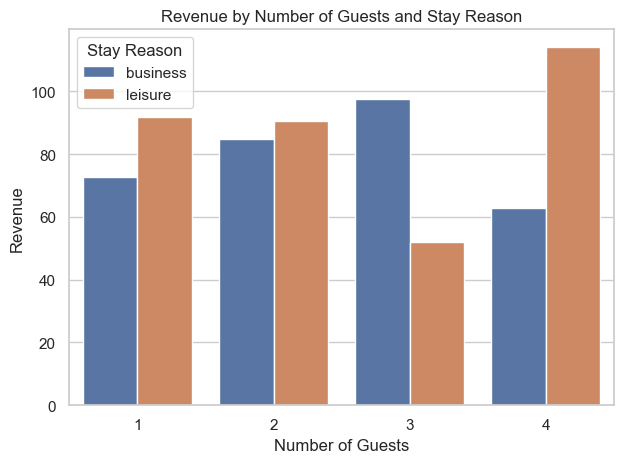

In [14]:
# viz the mean of Revenue for Number of Guests and Stay Reason
data_to_ana = data.groupby(['reason_for_stay' , 'number_of_guests' ])['amount_spent'].mean().reset_index()
print(data_to_ana)

plt.figure()

sns.barplot(data_to_ana , x = 'number_of_guests' , y = 'amount_spent' , hue = 'reason_for_stay')

plt.title('Revenue by Number of Guests and Stay Reason')
plt.xlabel('Number of Guests')
plt.ylabel('Revenue')
plt.legend(title='Stay Reason')

plt.tight_layout()
plt.show()

## insights
- analyze the revenue by number of guests and stay reason
- by create column unstacked charts
### overall
- the lesiure stay attend to spend more than the business stay
#### detailed analysis
- 4 guests with leisure stay attend to spend more than any other category by average spend 114
- 3 geusts with leisure stay is the less category to spend with 51
### recommendations
- make quntity discounts booking for the the forth person
- make a couple programs to the 2 guests with leisure stay (mostly they are cuples)
- make a individual programs to the 1 guest with leisure stay 

category  Activities    Dining       Spa
month                                   
9.0          4633.97  17065.55   7194.17
10.0         5470.21  18737.53   9783.28
11.0         4931.45  21018.79  10642.04
12.0          960.29   4176.29   2306.49


<Figure size 640x480 with 0 Axes>

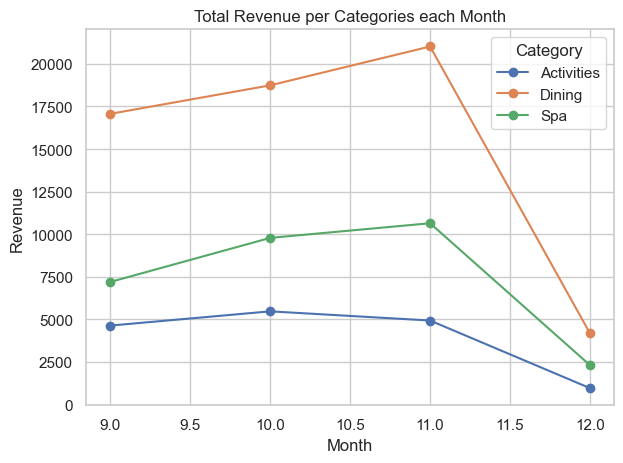

In [29]:
# analyze average per the categories each month
data['month'] = data['check_in_date'].dt.month

calc_month_cat_rev = data.groupby(['month' , 'category']).agg({ 'amount_spent' : 'sum' , 'guest_id' : 'count'}).reset_index()
calc_month_cat_rev['average_revenue_per_guest'] = calc_month_cat_rev['amount_spent'] / calc_month_cat_rev['guest_id']
pvt_calc_month_cat_rev = calc_month_cat_rev.pivot_table(index = 'month' , columns = 'category' , values = 'amount_spent')

print(pvt_calc_month_cat_rev)

plt.figure()

pvt_calc_month_cat_rev.plot( kind = 'line' , marker = 'o')

plt.title('Total Revenue per Categories each Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title = 'Category')

plt.tight_layout()
plt.show()


## insights
- we need to know each month have the highest revenue
- by creating line chart to track revenue overtime
- november is the highest in revenue with
1 - 210.18k revenue in dining
2 - 106.42k revenue in spa
- all the revenue droped in Desember (winter)
### recommendations :
- focus our marketing in summer and showing the service we provide

## Core Business Metric: Ancillary Revenue Per Stay (ARPS)

**Definition**: Total ancillary revenue divided by number of stays  
**Why it matters**: Measures how effectively we upsell dining, spa, activities etc. beyond room revenue  
**Business goal**: Increase ARPS by 12–15% YoY through targeted offers

**Calculation**:

In [31]:
# average revenue per stay
total_ancillary = data['amount_spent'].sum()
unique_stays = data['stay_id'].nunique()
arps = total_ancillary / unique_stays

print(f"Total ancillary revenue : ${total_ancillary:,.2f}")
print(f"Number of unique stays   : {unique_stays}")
print(f"ARPS                     : ${arps:,.2f}")

Total ancillary revenue : $106,920.06
Number of unique stays   : 571
ARPS                     : $187.25


category
Activities     28.013870
Dining        106.826900
Spa            52.409772
Name: amount_spent, dtype: float64


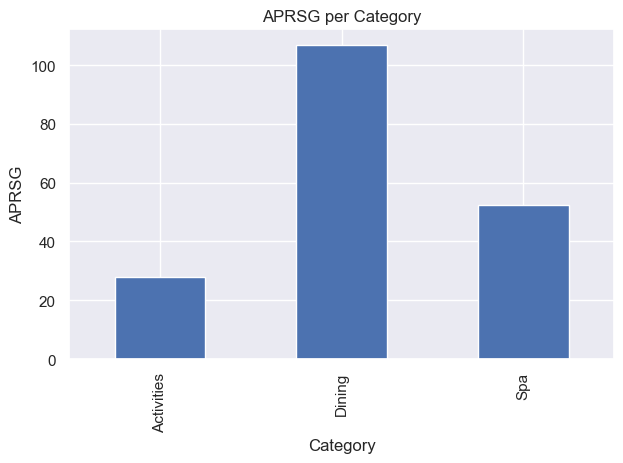

In [48]:
# AVPS by loyalty tiers
total_ancillary_per_loyalty_tiers = data.groupby('category')['amount_spent'].sum()
unique_stays = data['stay_id'].nunique()
arps_p_ly = total_ancillary_per_loyalty_tiers / unique_stays
arps_p_ly.reset_index()
print(arps_p_ly)

plt.figure()

arps_p_ly.plot( kind = 'bar' )

plt.title('APRSG per Category')
plt.xlabel('Category')
plt.ylabel('APRSG')

plt.tight_layout()
plt.show()